# Project #3 Random Forest

## Importing Packages

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import re

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Data Set

In [3]:
Gene = pd.read_csv(r"/Users/peterlyon/Downloads/Coding+Test+L3+Datafiles/gene.csv")
Gene

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## Data Exploration

In [4]:
Gene.describe().style.format(thousands=",", decimal=".")

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,"284,807.000000","284,807.000000","284,807.000000","284,807.000000","284,807.000000","284,807.000000","284,807.000000","284,807.000000","284,807.000000","284,807.000000","284,807.000000","284,807.000000","284,807.000000","284,807.000000","284,807.000000","284,807.000000","284,807.000000","284,807.000000","284,807.000000","284,807.000000","284,807.000000","284,807.000000","284,807.000000","284,807.000000","284,807.000000","284,807.000000","284,807.000000","284,807.000000","284,807.000000"
mean,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.001727
std,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.088850,1.020713,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,0.041527
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.498850,-0.456299,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,0.000000
50%,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,0.000000
75%,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.493150,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,1.000000


In [5]:
Gene.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [6]:
Gene.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

## Applying Random Forest

### Train Test Split

In [7]:
X = Gene.drop(['Class'], axis=1)

y = Gene['Class']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [10]:
X_train.shape, X_test.shape

((190820, 28), (93987, 28))

In [11]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
134955,1.146174,-0.083967,0.602963,0.725410,-0.396283,0.186275,-0.318544,0.185287,0.362387,-0.085385,...,0.120181,-0.155253,-0.012052,0.219314,-0.068172,0.077802,0.482796,0.451360,-0.002776,-0.003524
84470,-0.918050,0.578744,1.168159,-0.862173,0.969264,0.483973,0.953430,0.188512,-0.866718,-0.734780,...,-0.337563,0.104206,0.102956,0.073220,-0.324398,-1.129387,0.622502,0.395548,-0.042526,0.032731
176085,-2.013096,-3.261460,-1.443935,0.149307,2.734412,-1.572646,0.380914,-0.058952,0.668700,-1.065447,...,0.151189,1.377841,0.398680,0.005726,1.652294,0.136111,-1.705085,-0.522617,-0.031407,0.243772
79348,-0.767334,0.383415,0.210914,0.035407,0.059217,1.220341,-0.053366,0.718190,-1.945750,0.732852,...,0.401809,-0.064315,-0.145465,-0.121835,-0.023886,-1.764699,-0.060345,-0.080600,0.292808,0.112469
63554,-0.817828,1.621705,0.911472,1.305673,-0.402086,1.031816,-1.972642,-5.092458,-1.570995,-1.018347,...,0.329111,1.300047,-2.932584,-0.519522,0.194226,0.138621,0.768231,-0.580148,0.027377,0.213998


In [12]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,...,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,...,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,...,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,...,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,...,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571


In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rfc = RandomForestClassifier(n_estimators=10, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.8f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.99960633


In [19]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

rfc_100.fit(X_train, y_train)

y_pred_100 = rfc_100.predict(X_test)

print('Model accuracy score with 100 decision-trees : {0:0.8f}'.format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.99960633


In [20]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [21]:
V_Score = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

V_Score

V17    0.184975
V12    0.158799
V14    0.102192
V11    0.083833
V10    0.071246
V16    0.043580
V9     0.036315
V7     0.028389
V18    0.027161
V4     0.023330
V26    0.020954
V21    0.020264
V1     0.017639
V3     0.015094
V6     0.014542
V8     0.014433
V19    0.014315
V27    0.013547
V15    0.013058
V20    0.012813
V5     0.012465
V28    0.012336
V13    0.011257
V24    0.010648
V22    0.010387
V25    0.010216
V2     0.008891
V23    0.007321
dtype: float64

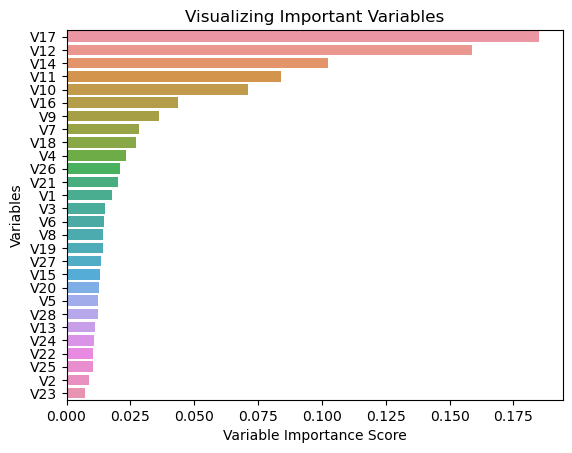

In [22]:
sns.barplot(x=V_Score, y=V_Score.index)

plt.xlabel('Variable Importance Score')

plt.ylabel('Variables')

plt.title("Visualizing Important Variables")

plt.show()

<AxesSubplot:>

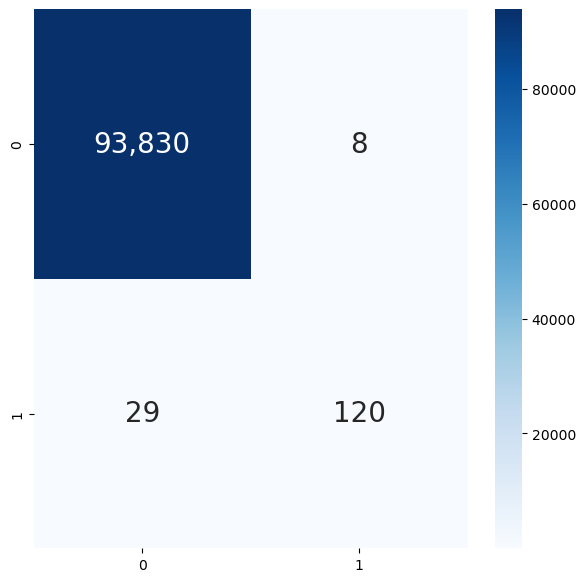

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (7,7))
sns.heatmap(cm, cmap="Blues", annot=True, annot_kws={"size": 20}, fmt=",.0f")

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.94      0.81      0.87       149

    accuracy                           1.00     93987
   macro avg       0.97      0.90      0.93     93987
weighted avg       1.00      1.00      1.00     93987

